# 4. Analyse de la saisonnalité

Comprendre les cycles saisonniers

## Importation des bibliothèques

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Charte graphique

In [6]:
# Couleurs principales
MINI_BLUE = '#607D8B'    
MINI_GREEN = '#A5D6A7'   
MINI_GRAY = '#9E9E9E'    

MANDARINE = '#FF9800'    
SOFT_ORANGE = '#FFC107'  
BLEU_CANARD = '#00796B'     
WINE = '#880E4F'  

# fond et lignes de structure
LIGHT_GRID = '#EDEDED' 
BG_WHITE = '#FFFFFF'     
LIGHT_GRAY = '#BDBDBD'

def set_minimalist_style():
    """Applique le style graphique 'Minimaliste 2025' pour la clarté."""
    
    # 1. Utiliser le thème 'white' de Seaborn
    sns.set_theme(style="white") 
    
    # Définir la nouvelle séquence de couleurs complète (7 couleurs)
    FULL_COLOR_CYCLE = [
        MINI_BLUE,
        MINI_GREEN,
        MINI_GRAY,
        MANDARINE, 
        SOFT_ORANGE, 
        BLEU_CANARD,
        WINE
    ]
    
    # 2. Modifier les paramètres globaux (rcParams)
    plt.rcParams.update({
        
        # --- FOND ET CADRE ---
        'figure.facecolor': BG_WHITE,
        'axes.facecolor': BG_WHITE,
        'axes.edgecolor': LIGHT_GRAY, 
        'axes.linewidth': 0.5,
        
        # --- GRILLE ---
        'axes.grid': True,
        'grid.color': LIGHT_GRID,
        'grid.linestyle': '-',
        'grid.linewidth': 0.7,
        
        # --- TYPOGRAPHIE ET LABELS ---
        'font.family': 'sans-serif',
        'axes.titlesize': 18,
        'axes.labelsize': 11,
        'legend.frameon': False,
        
        # --- LIGNES ET PALETTE ---
        'lines.linewidth': 1.8,
        # Définition du cycle de 7 couleurs pour Matplotlib
        'axes.prop_cycle': plt.cycler('color', FULL_COLOR_CYCLE) 
    })
    
    # 3. Appliquer également la palette de 7 couleurs à Seaborn
    sns.set_palette(FULL_COLOR_CYCLE)

set_minimalist_style()

## 4.a. Cycles annuels

### Importation des données

In [29]:
df_mois = pd.read_csv(r"../1.Donnees\3.Exports_csv\1.analyse_descriptive\1.1.vue_globale_3ans\1.1.1.indicateurs_mois_annee.csv").copy()
df_mois. sample(10)

,annee,mois,total_transactions,volume_total_vendu,ca_total,marge_brute,panier_moyen,marge_pct
35,2024,12,8229,19880,443227.5,228377.70,53.86,51.53
3,2022,4,2991,7169,151284.1,78839.66,50.58,52.11
8,2022,9,3653,8817,188880.8,97826.88,51.71,51.79
0,2022,1,3268,7945,170388.3,88688.18,52.14,52.05
15,2023,4,3288,7928,155048.5,82141.50,47.16,52.98
25,2024,2,2867,6965,161123.9,82560.54,56.20,51.24
34,2024,11,5332,12888,279784.5,145463.50,52.47,51.99
2,2022,3,3030,7267,151821.3,79049.38,50.11,52.07
13,2023,2,2590,6365,153043.4,77655.24,59.09,50.74
16,2023,5,3087,7363,154533.0,80836.80,50.06,52.31


### Préparation des données

In [ ]:
# --- Nettoyage et Préparation des Indicateurs Mensuels ---

# Suppression des colonnes d'indicateurs non nécessaires pour l'analyse de la tendance mensuelle.
df_mois.drop(columns=['panier_moyen', 'total_transactions'], inplace=True)

# Concatenation des colonnes 'annee' et 'mois' pour créer une clé temporelle.
# Le format 'AAAA-MM' est construit en convertissant les composants en chaîne de caractères.
df_mois['date'] = df_mois['annee'].astype(str) + '-' + df_mois['mois'].astype(str)

# Conversion de la clé temporelle composite en objet datetime.
df_mois['date_complete'] = pd.to_datetime(df_mois['date']) 

# Suppression des colonnes intermédiaires ('date') et des composants d'origine ('annee', 'mois').
df_mois = df_mois.drop(columns=['date', 'annee', 'mois'])

# Définition de l'index du DataFrame sur la colonne 'date_complete'.
df_mois = df_mois.set_index(['date_complete'])

# Affichage d'un échantillon pour la vérification de la structure finale et du nouvel index.
df_mois.sample(10)

### Visualisation

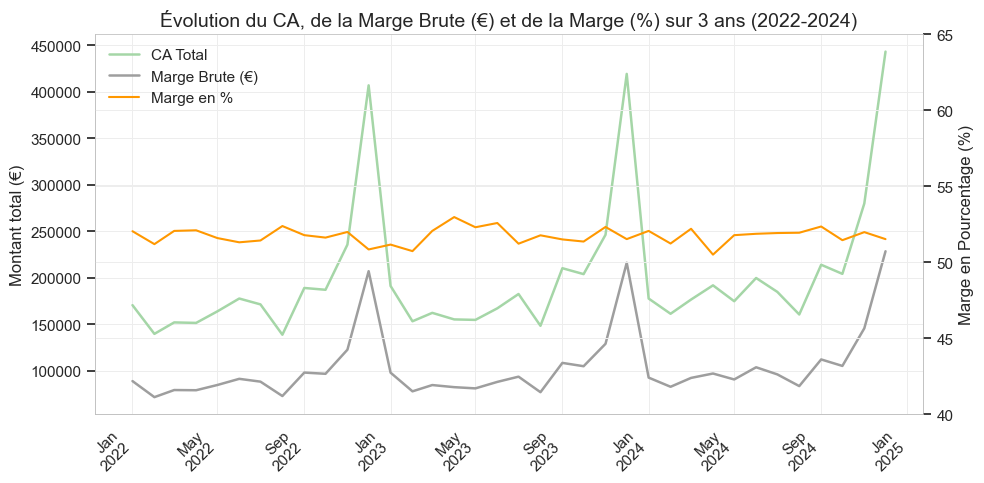

In [20]:
import matplotlib.dates as mdates # Importation pour le formatage avancé des dates

# --- Initialisation de la Figure et du Double-Axe ---
# Création de la figure avec l'axe primaire (ax1).
fig, ax1 = plt.subplots(figsize=(10, 5))

# --- Tracé des Indicateurs en Valeur (Axe Y Gauche) ---
# Tracé de l'évolution du Chiffre d'Affaires Total (CA) sur l'axe primaire.
ax1.plot(
    df_mois.index, df_mois['ca_total'], 
    label='CA Total', 
    color='#A5D6A7'
)
# Tracé de l'évolution de la Marge Brute en Euros sur le même axe Y (ax1).
ax1.plot(
    df_mois.index, df_mois['marge_brute'], 
    label='Marge Brute (€)', 
    color='#9E9E9E' # Gris Moyen
)

# Configuration de l'axe Y primaire (Montant en Euros).
ax1.set_ylabel('Montant total (€)', fontsize=12)
ax1.tick_params(axis='y')

# --- Tracé de l'Indicateur en Pourcentage (Axe Y Droit) ---
# Création du deuxième axe des ordonnées (Y) partageant l'axe X (twinx).
ax2 = ax1.twinx()

# Tracé de la Marge en Pourcentage (%) sur l'axe secondaire.
ax2.plot(
    df_mois.index, df_mois['marge_pct'], 
    label='Marge en %', 
    color='#FF9800', 
    linewidth=1.5
)
# Configuration de l'axe Y secondaire (Marge en Pourcentage).
ax2.set_ylabel('Marge en Pourcentage (%)', fontsize=12)
ax2.tick_params(axis='y')
# Définition des limites Y pour mettre en évidence la variation du pourcentage.
ax2.set_ylim(40, 65)

# --- Configuration du Graphique et de la Légende ---

ax1.set_xlabel('') # Nettoyage de l'étiquette X redondante.

# Définition du titre du graphique.
plt.title('Évolution du CA, de la Marge Brute (€) et de la Marge (%) sur 3 ans (2022-2024)', fontsize=14)

# Fusion des légendes des deux axes (ax1 et ax2).
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# --- Formatage de l'Axe Temporel ---
# Utilisation de mdates.DateFormatter pour formater l'axe X : Mois abrégé (\%b) suivi de l'Année (\%Y).
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

# Ajustement automatique de la rotation des étiquettes de date pour éviter le chevauchement.
plt.gcf().autofmt_xdate(rotation=45)

# Ajustement final des marges.
plt.tight_layout()

plt.show()

## 4.b. Cycles mensuels

### Importation des données

In [30]:
df_top_CA = pd.read_csv(r"../1.Donnees\3.Exports_csv\1.analyse_descriptive\1.3.analyse_temporelle\1.3.2.top_10_mois_CA.csv").copy()

### Préparation des données

In [22]:
# --- Construction de l'Index Temporel et Nettoyage ---

# Concaténation des composantes 'annee' et 'mois' en une chaîne de caractères au format 'AAAA-MM'.
df_top_CA['date'] = df_top_CA['annee'].astype(str) + '-' + df_top_CA['mois'].astype(str)

# Conversion de la clé temporelle composite en type datetime.
df_top_CA['date_complete'] = pd.to_datetime(df_top_CA['date']) 

# Suppression des colonnes intermédiaires et des indicateurs en valeur absolue non requis pour l'analyse de tendance.
df_top_CA = df_top_CA.drop(columns=['date', 'annee', 'mois', 'total_transactions', 'volume_total_vendu', 'marge_brute'])

# Définition de l'index du DataFrame sur la nouvelle colonne temporelle.
df_top_CA = df_top_CA.set_index(['date_complete'])

# Affichage d'un échantillon pour la vérification de la structure et de l'index.
df_top_CA.sample(10)

,ca_total,panier_moyen,marge_pct
date_complete,,,
2023-09-01,210150.5,54.22,51.51
2023-10-01,203785.9,54.04,51.37
2024-11-01,279784.5,52.47,51.99
2022-12-01,406920.7,55.33,50.85
2023-12-01,419240.3,53.57,51.53
2024-09-01,213864.9,50.74,52.36
2024-10-01,204063.4,54.13,51.46
2023-11-01,246132.5,50.56,52.33
2024-12-01,443227.5,53.86,51.53


### Visualisation

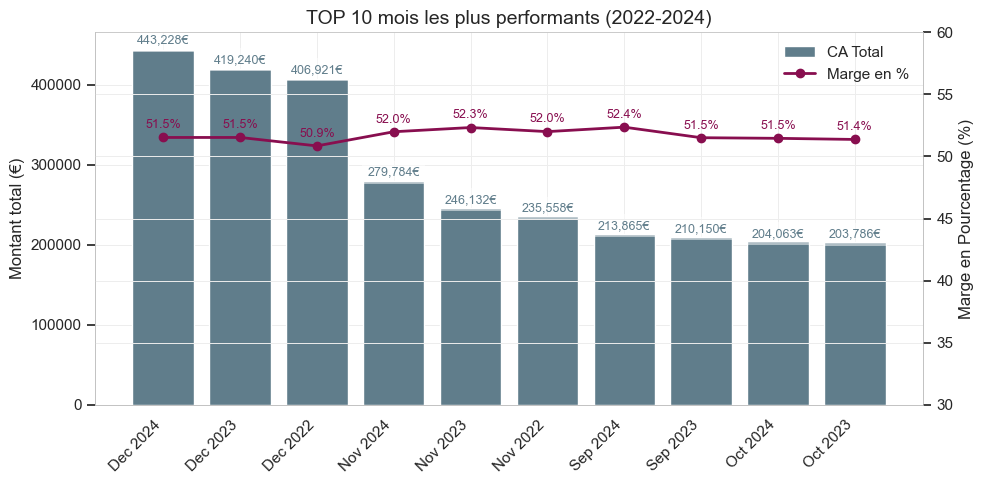

In [ ]:
# --- Initialisation de la Figure et du Double-Axe ---
fig, ax1 = plt.subplots(figsize=(10, 5))

# Création des positions numériques sur l'axe X (0, 1, 2...)
x_positions = np.arange(len(df_top_CA.index)) 

# --- Tracé du Chiffre d'Affaires Total (Axe Y Gauche - Barres) ---
bar_container = ax1.bar(
    x_positions, 
    df_top_CA['ca_total'], 
    label='CA Total', 
    color=MINI_BLUE,
    width=0.8 
)

ax1.set_ylabel('Montant total (€)', fontsize=12)
ax1.tick_params(axis='y')

# Ajout des annotations de valeur sur les barres de CA :
for bar in bar_container:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2, # Centre X de la barre.
        height + (height * 0.01), # Position Y légèrement au-dessus.         
        f'{height:,.0f}€',  # Formatage des milliers avec symbole Euro.         
        ha='center', 
        va='bottom',
        fontsize=9,
        color=MINI_BLUE
    # Ajout d'une boîte blanche semi-transparente pour maximiser la lisibilité des annotations sur les barres.
    ).set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='none')) 


# --- Tracé de la Marge en Pourcentage (Axe Y Droit - Ligne) ---
# Création du deuxième axe Y pour l'indicateur en pourcentage.
ax2 = ax1.twinx()

ax2.plot(
    x_positions, 
    df_top_CA['marge_pct'], 
    label='Marge en %', 
    color=WINE,
    marker='o', 
    linewidth=2
)

ax2.set_ylabel('Marge en Pourcentage (%)', fontsize=12)
ax2.tick_params(axis='y')

# Définition des limites Y pour mettre en évidence les variations de marge (30% à 60%).
ax2.set_ylim(30, 60)

# Ajout des annotations de valeur sur la ligne de marge en pourcentage :
for x, y in zip(x_positions, df_top_CA['marge_pct']):
    
    ax2.text(
        x, 
        y + 0.5,
        f'{y:.1f}%',  # Formatage : une décimale avec symbole %.
        ha='center',
        va='bottom',
        fontsize=9,
        color=WINE)


# --- Configuration de l'Axe X (Dates) ---
# Formatage des objets datetime de l'index en chaînes de caractères lisibles ('Mois Année').
formatted_dates = [d.strftime('%b %Y') for d in df_top_CA.index]

# Application des positions et des étiquettes de date formatées à l'axe X.
ax1.set_xticks(x_positions) 
ax1.set_xticklabels(
    formatted_dates, 
    rotation=45, # Rotation des étiquettes pour éviter le chevauchement.
    ha='right'
)


# --- Titre et Légende ---
ax1.set_xlabel('')
plt.title('TOP 10 mois les plus performants (2022-2024)', fontsize=14)


# Fusion des légendes des deux axes en un seul bloc.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


# Ajustement des marges pour un rendu propre.
plt.tight_layout()

plt.show()

## 4.c. Plages horaires de vente

### Importation des données

In [31]:
df_plages_horaires = pd.read_csv(r"../1.Donnees\3.Exports_csv\1.analyse_descriptive\1.3.analyse_temporelle\1.3.3.variations_horaires.csv").copy()
df_plages_horaires

,semaine_weekend,ordre_plage,plage_horaire,total_transactions,volume_total_vendu,ca_total,marge_brute,panier_moyen,marge_pct
0,Jour de Semaine,4,Soir,52495,126269,2792567.9,1441727.74,53.20,51.63
1,Weekend,4,Soir,25783,62112,1371132.7,708638.82,53.18,51.68
2,Weekend,3,Après-midi,13826,33185,751680.2,385951.32,54.37,51.35
3,Jour de Semaine,5,Nuit,12590,30513,656375.8,340582.48,52.13,51.89
4,Jour de Semaine,3,Après-midi,10033,24188,526181.1,273003.46,52.45,51.88
5,Weekend,5,Nuit,5779,13912,295072.5,153788.70,51.06,52.12
6,Jour de Semaine,1,Matin,5059,12251,278088.6,143242.16,54.97,51.51
7,Jour de Semaine,2,Midi,4964,12029,260401.5,134798.50,52.46,51.77
8,Weekend,2,Midi,4221,10232,202245.9,107142.74,47.91,52.98
9,Weekend,1,Matin,2003,4797,108106.8,55594.48,53.97,51.43


### Préparation des données

In [27]:
# Le But de l'analyse est d'identifier les plages horaires hebdomadaires qui sont le plus propices à la vente. 
# Concaténation des colonnes semaine_weekend et plage_horaire : 
df_plages_horaires['moment_semaine']= df_plages_horaires['semaine_weekend'] + '-' + df_plages_horaires['plage_horaire'] 

# Définition de l'Index du DataFrame sur la nouvelle colonne :
df_plages_horaires.set_index('moment_semaine', inplace = True)

# Suppression des colonnes inutiles : 
df_plages_horaires = df_plages_horaires.drop(columns = ['total_transactions', 'semaine_weekend', 'plage_horaire','ordre_plage','marge_brute','panier_moyen', 'marge_pct'])
df_plages_horaires

,volume_total_vendu,ca_total
moment_semaine,,
Jour de Semaine-Soir,126269,2792567.9
Weekend-Soir,62112,1371132.7
Weekend-Après-midi,33185,751680.2
Jour de Semaine-Nuit,30513,656375.8
Jour de Semaine-Après-midi,24188,526181.1
Weekend-Nuit,13912,295072.5
Jour de Semaine-Matin,12251,278088.6
Jour de Semaine-Midi,12029,260401.5
Weekend-Midi,10232,202245.9


### Visualisation

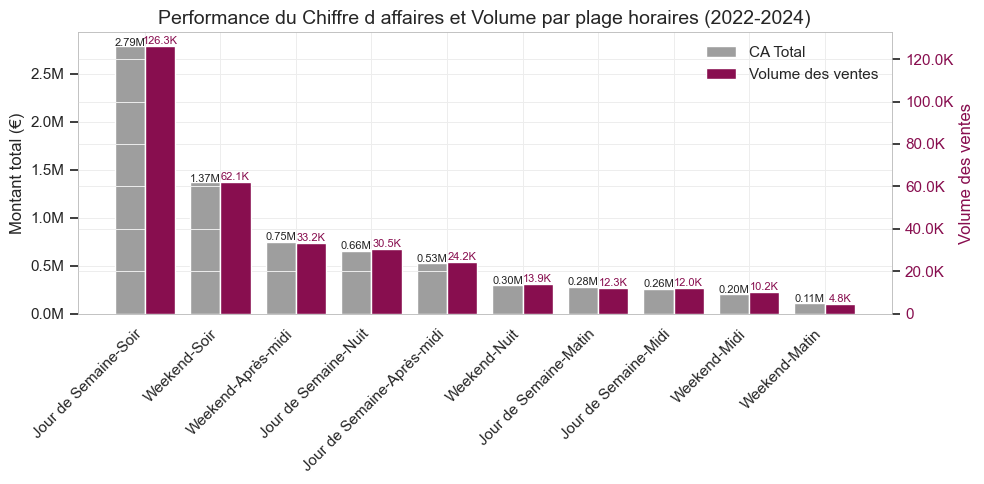

In [28]:
from matplotlib.ticker import FuncFormatter

# --- Définitions des Fonctions de Formatage d'Axe ---

def thousands_formatter(x, pos):
    """Fonction pour formater les valeurs Y en milliers (K)."""
    if x >= 1000:
        return f'{x / 1000:.1f}K'
    return f'{x:.0f}'

def millions_formatter(x, pos):
    """Fonction pour formater les valeurs Y en millions (M)."""
    return f'{x / 1000000:.1f}M'

# --- Préparation des Axes et Paramètres de Base ---

# Création des positions numériques pour l'axe X (nécessaire pour les barres groupées).
x_positions = np.arange(len(df_plages_horaires.index)) 
x_labels = df_plages_horaires.index
bar_width = 0.4 # Définition de la largeur des barres pour le groupement.

# Initialisation de la figure et du double-axe.
fig, ax1 = plt.subplots(figsize=(10, 5))

# --- Tracé du Chiffre d'Affaires Total (Axe Y Gauche - Barres) ---
# Tracé des barres du CA, décalées vers la gauche (x_positions - bar_width/2).
bar_container_ca = ax1.bar(
    x_positions - bar_width/2, 
    df_plages_horaires['ca_total'], label='CA Total', color=MINI_GRAY, width=bar_width 
)

ax1.set_ylabel('Montant total (€)', fontsize=12)

# Application du formatage en millions (M) à l'axe Y primaire.
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter)) 

# Annotations de valeur pour le CA (en millions) :
for bar in bar_container_ca:
    height = bar.get_height()
    # Placement de l'annotation à l'intérieur de la barre (height - 0.01).
    ax1.text(
        bar.get_x() + bar.get_width() / 2, height - (height * 0.01),  
        f'{height / 1000000:.2f}M', ha='center', va='bottom', fontsize=8
    )

# --- Tracé du Volume des Ventes (Axe Y Droit - Barres) ---
# Création du deuxième axe des ordonnées.
ax2 = ax1.twinx()

# Tracé des barres du Volume des Ventes, décalées vers la droite.
bar_container_volume = ax2.bar(
    x_positions + bar_width/2, 
    df_plages_horaires['volume_total_vendu'], label='Volume des ventes', color=WINE, width=bar_width 
)

ax2.set_ylabel('Volume des ventes', fontsize=12, color=WINE)

# Application du formatage en milliers (K) à l'axe Y secondaire.
ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter)) 
ax2.tick_params(axis='y', labelcolor=WINE)
ax2.set_ylim(bottom=0) # S'assurer que l'axe commence à zéro pour une comparaison visuelle valide.


# Annotations de valeur pour le Volume (en milliers K) :
for bar in bar_container_volume:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2, 
        height,               
        f'{height / 1000:.1f}K', # Formatage en milliers.                       
        ha='center', va='bottom', fontsize=8, color=WINE
    )


# --- Configuration de l'Axe X, Titre et Légende ---

# Application des positions et des étiquettes des plages horaires à l'axe X.
ax1.set_xticks(x_positions)
# Rotation des étiquettes X pour maximiser la lisibilité.
ax1.set_xticklabels(x_labels, rotation=45, ha='right')
ax1.set_xlabel('')
plt.title('Performance du Chiffre d affaires et Volume par plage horaires (2022-2024)', fontsize=14)

# Fusion des légendes des deux axes en un seul bloc.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Ajustement des marges.
plt.tight_layout()

plt.show()